# FACIAL KEYPOINTS DETECTION (TEAM: FACE-X)

## INTRODUCTION
Fire Sunglasses.. No problem! Mustache.. You got it!  Filters that overlay objects on your face on social media or on Zoom video calls have been trending for some time now.  However, the key technology behind these cool, fun, and easy-to-use aspects of social media applications is anything but easy. The main technique these rely on is called facial keypoints detection. 

Facial keypoints are specific locations on a persons face from wich a person's expresssion can be identified and examined. Facial keypoint detection has serious applications beyond just fun social media filters.  The approach is a fundamental building block in several important areas such as medical diagnosis, face recognition biometrics, analyzing facial micro expressions and similar. 

## MOTIVATION
Our primary motivation for this project is learning and applying deep learning techniques to further research in this field of study that has wide ranging applications.  Detecting facial keypoints is a tough problem to overcome given variations in facial features and image quality. A person's facial features vary according to size, expression, and tilt/angle of the head.  The image quality changes according to lighting conditions, lens perspective, and camera angle. These variations combined with the necessity to have highly accurate predictions have made facial keypoints detection a much researched topic of study. After all, mustache eyebrows are rarely 'dope' for a person's self image - be it business or fun.

## Training Data
The dataset for this project comes from a Kaggle competition. The dataset consists of 7049 two-dimensional 8-bit grayscale training images.  Each image is a 96 X 96 pixel square with each pixel having an integer value between 0 to 255. The images also have x, y co-ordinates for the 15 facial keypoints as listed in the table below. The first 30 columns in each row correspond to the x,y values of the facial keypoints and the last column represents the image as a list of 9216 numbers (96 X 96 pixels).

| 15 Facial Keypoints|  |
| :---: | :---: |
| Left Eye Center | Right Eye Center |
| Left Eye Inner Corner | Right Eye Inner Corner |
| Left Eye Outer Corner | Right Eye Outer Corner |
| Left Eyebrow Inner End | Right Eyebrow Inner End |
| Left Eyebrow Outer End | Right Eyebrow Outer End |
| Mouth Left Corner | Mouth Right Corner |
| Mouth Center Top | Mouth Center Bottom |
| Nose Tip | | 

## EXPLORATORY DATA ANALYSIS

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from matplotlib.cbook import boxplot_stats

TRAIN_DATA = './data/training.csv'                    # Training dataset
TEST_DATA = './data/test.csv'                         # Test dataset
IMG_SIZE = 96                                         # Image size 

In [5]:
#### DATA PROCESSING FUNCTIONS ####
def load_dataframe(testData=False, loadCols=None):
    """
        Loads dataframe from training or test files as needed. 
        Pass a list of columns, it a subset is needed. 
    """
    # Read test or training data as needed from CSV file
    loadFile = TEST_DATA if testData else TRAIN_DATA
    df = pd.read_csv(loadFile)

    # Convert the image column into a numpy array by removing spaces between pixel values
    df['Image'] = df['Image'].apply(lambda im: np.fromstring(im, sep=' '))

    # If a subset of columns was requested, extract the columns and the image
    if loadCols:  
         df = df[list(loadCols) + ['Image']]

    return df

def show_keypoints(facialImage, keyPoints, drawContour):
    '''
        Show the facial image with the keypoints passed. 
    '''
    if not (drawContour):
        plt.imshow(facialImage, cmap='gray')
    else:
        plt.contour(facialImage, colors='black', origin='upper')

    if len(keyPoints):
        plt.scatter(keyPoints[:, 0], keyPoints[:, 1], s=24, marker ='x', c='r')    
        
def show_images(df, indxs, ncols=5, figsize=(15,10), with_keypoints=True, drawContour=False):
    '''
    Show images with keypoints in grids
    Args:
        df (Dataframe): data (M x N)
        idxs (iterators): list, Range, Indexes
        ncols (integer): number of columns (images by rows)
        figsize (float, float): width, height in inches
        with_keypoints (boolean): True if show image with keypoints
    '''
    plt.figure(figsize=figsize)
    nrows = len(indxs) // ncols + 1
    for i, idx in enumerate(indxs):
        image = df.loc[idx, 'Image'].astype(np.float32).reshape(-1, IMG_SIZE)
        if with_keypoints:
            keypoints = df.loc[idx].drop('Image').values.astype(np.float32).reshape(-1, 2)
        else:
            keypoints = []
        plt.subplot(nrows, ncols, i + 1)
        plt.title(f'SAMPLE #{idx}')
        plt.axis('off')
        plt.tight_layout()
        show_keypoints(image, keypoints, drawContour)
    plt.show()

In [6]:
# Load the training data 
df = load_dataframe(testData=False)

# Print the dataframe shape and a count of values in each column
print(df.shape)
print(df.count())

(7049, 31)
left_eye_center_x            7039
left_eye_center_y            7039
right_eye_center_x           7036
right_eye_center_y           7036
left_eye_inner_corner_x      2271
left_eye_inner_corner_y      2271
left_eye_outer_corner_x      2267
left_eye_outer_corner_y      2267
right_eye_inner_corner_x     2268
right_eye_inner_corner_y     2268
right_eye_outer_corner_x     2268
right_eye_outer_corner_y     2268
left_eyebrow_inner_end_x     2270
left_eyebrow_inner_end_y     2270
left_eyebrow_outer_end_x     2225
left_eyebrow_outer_end_y     2225
right_eyebrow_inner_end_x    2270
right_eyebrow_inner_end_y    2270
right_eyebrow_outer_end_x    2236
right_eyebrow_outer_end_y    2236
nose_tip_x                   7049
nose_tip_y                   7049
mouth_left_corner_x          2269
mouth_left_corner_y          2269
mouth_right_corner_x         2270
mouth_right_corner_y         2270
mouth_center_top_lip_x       2275
mouth_center_top_lip_y       2275
mouth_center_bottom_lip_x    7016
mou

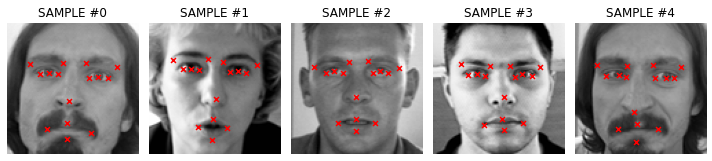

In [7]:
# Print a few sample images with valid keypoints
show_images(df, range(5), ncols=5, figsize=(10,5), with_keypoints=True)

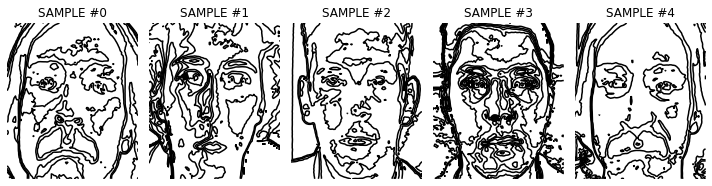

In [8]:
# Print the same sample images as contours just for fun
show_images(df, range(5), ncols=5, figsize=(10,5), with_keypoints=False, drawContour=True)

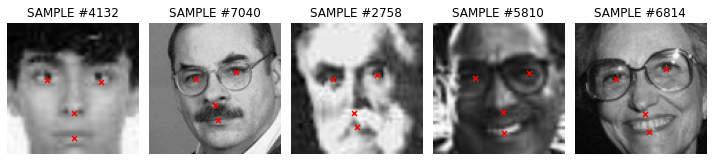

In [9]:
# Print a few sample images that are missing keypoints
missing_keypoints = df[df.isnull().any(axis=1)]
idxs = np.random.choice(missing_keypoints.index, 5)
show_images(df, idxs, ncols=5, figsize=(10,5), with_keypoints=True)

In [10]:
# Count of number of images with available number of keypoint features 
feature_counts = df.drop(['Image'], axis=1).notnull().sum(axis = 1).value_counts().sort_index()
print(feature_counts)

# A large number of images (i.e. 4765) have 8 or less facial keypoints in the training data.

6       10
8     4755
10       2
16       2
18       5
20       3
22       8
24       9
26      28
28      87
30    2140
dtype: int64


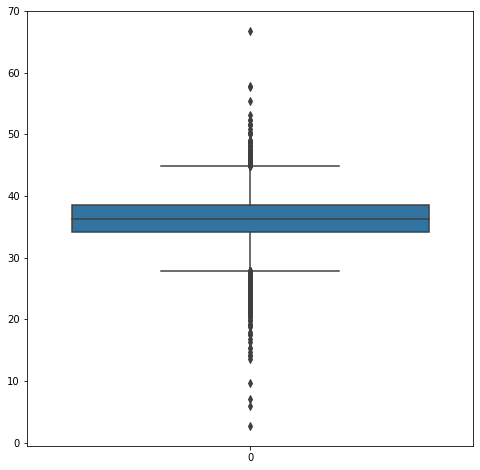

In [26]:
# Calculate the distance between eye centers to identify anomalies and outliers
eye_to_eye_distances = np.sqrt((df['right_eye_center_x'] - df['left_eye_center_x'])**2 + 
                              (df['right_eye_center_y'] - df['left_eye_center_y'])**2) 

# Plot distance between eye centers of the training images
plt.figure(figsize=(8, 8))
ax = sns.boxplot(data = eye_to_eye_distances)
# .set_title('Distance between Eye Centers (pixels)')

In [31]:
# for _ax in enumerate(ax, start=1):
#     print(_ax)

print(boxplot_stats(eye_to_eye_distances))
# ax = sns.boxplot(data=df)
outliers = [y for stat in boxplot_stats(eye_to_eye_distances) for y in stat['fliers']]
print(outliers)
# for y in outliers:
#     ax.plot(1, y, 'p')
# ax.set_xlim(right=1.5)
# plt.show()

[{'mean': nan, 'iqr': nan, 'cilo': nan, 'cihi': nan, 'whishi': nan, 'whislo': nan, 'fliers': array([], dtype=float64), 'q1': nan, 'med': nan, 'q3': nan}]
[]


In [ ]:
boxplot_stats()